In [4]:
!pwd

/content


       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27995       0       0       0       0       0       0       0       0       0   
27996       0       0       0       0       0       0       0       0       0   
27997       0       0       0       0       0       0       0       0       0   
27998       0       0       0       0       0       0       0       0       0   
27999       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel77

<ipython-input-7-3b9ea731960f>:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row[i+1] = min(255, row[i+1]+random.randint(50,150))
<ipython-input-7-3b9ea731960f>:28: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  row[i+1] = min(255, row[i+1]+random.randint(50,150))
<ipython-input-7-3b9ea731960f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anom['label'] = 1
<ipython

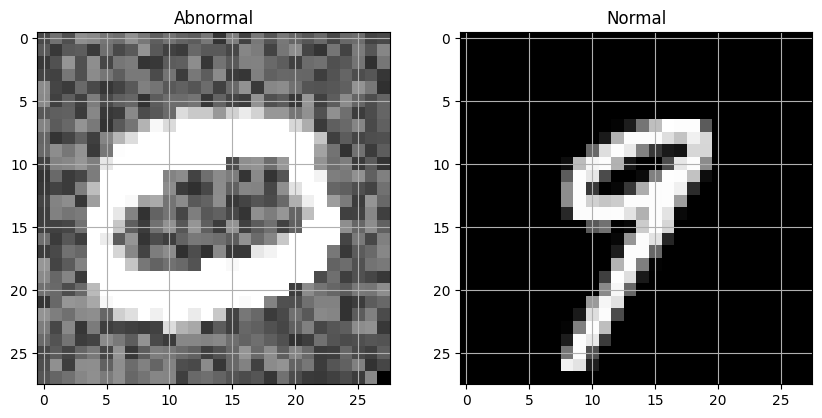

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 20 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


-----------------------------------------------
[EPOCH] 1/15
[LOSS] 0.0033812048701303346
Epoch Complete in 0:00:50.581654
-----------------------------------------------
[EPOCH] 2/15
[LOSS] 0.0033083567919120903
Epoch Complete in 0:00:45.726784
-----------------------------------------------
[EPOCH] 3/15
[LOSS] 0.0032328840572209585
Epoch Complete in 0:00:44.370253
-----------------------------------------------
[EPOCH] 4/15
[LOSS] 0.0031541005488307703
Epoch Complete in 0:00:43.972970
-----------------------------------------------
[EPOCH] 5/15
[LOSS] 0.0030726501705745854
Epoch Complete in 0:00:44.554382
-----------------------------------------------
[EPOCH] 6/15
[LOSS] 0.002987158962835868
Epoch Complete in 0:00:45.658647
-----------------------------------------------
[EPOCH] 7/15
[LOSS] 0.0028996591282387575
Epoch Complete in 0:00:44.119133
-----------------------------------------------
[EPOCH] 8/15
[LOSS] 0.002820225867841925
Epoch Complete in 0:00:44.783762
------------------

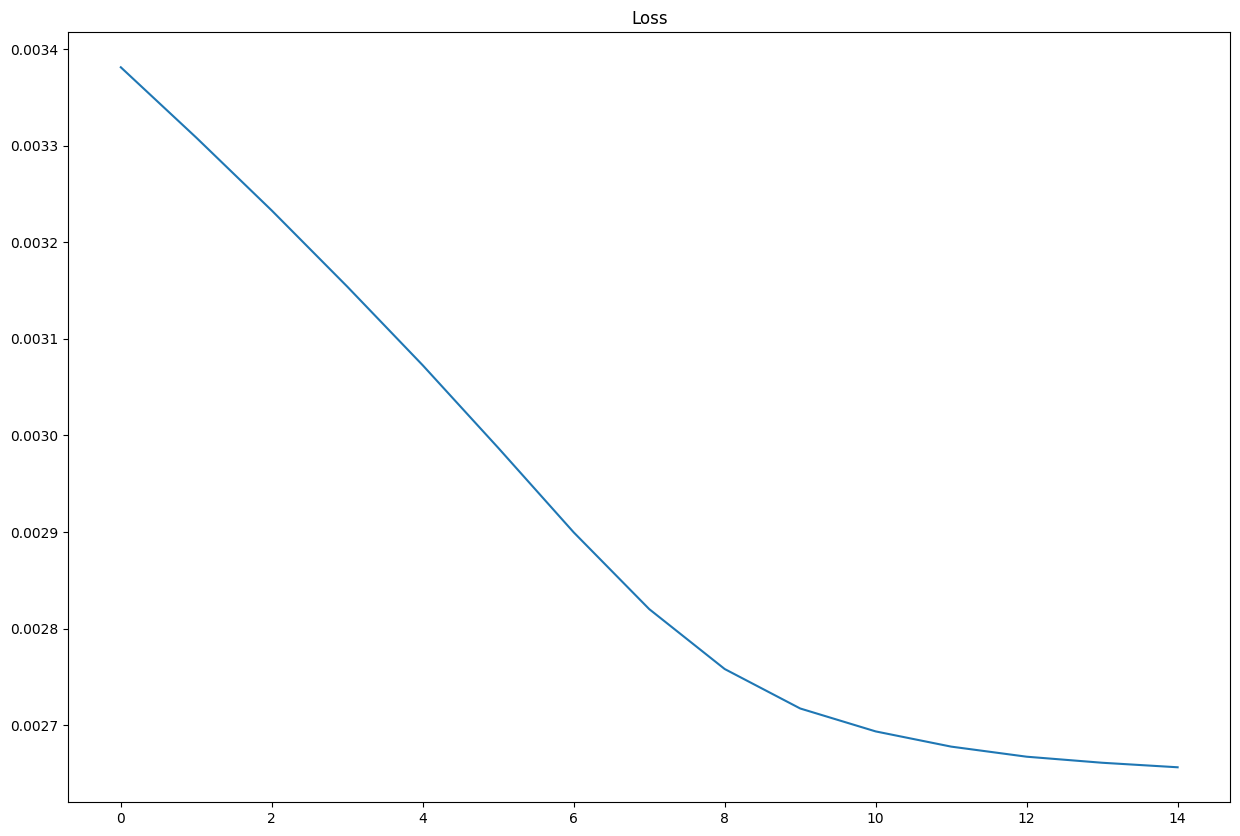

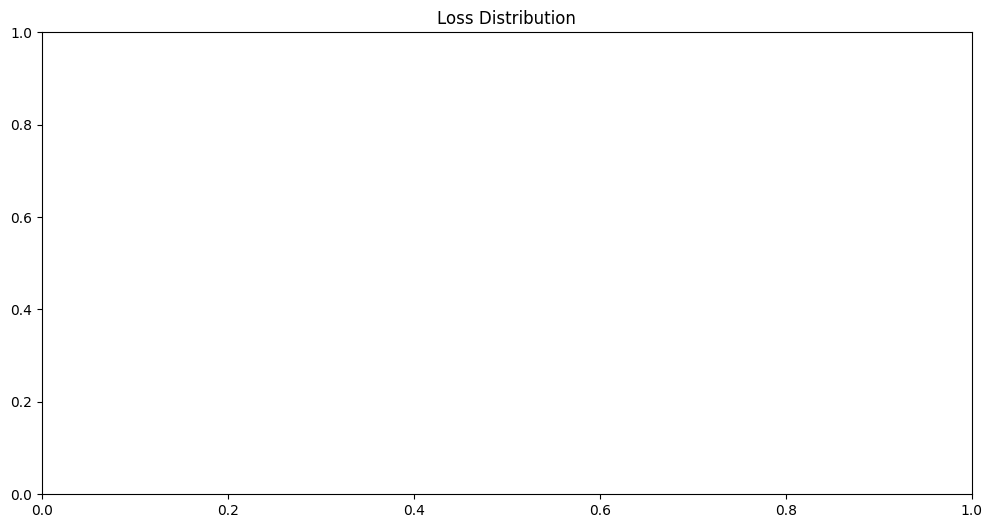

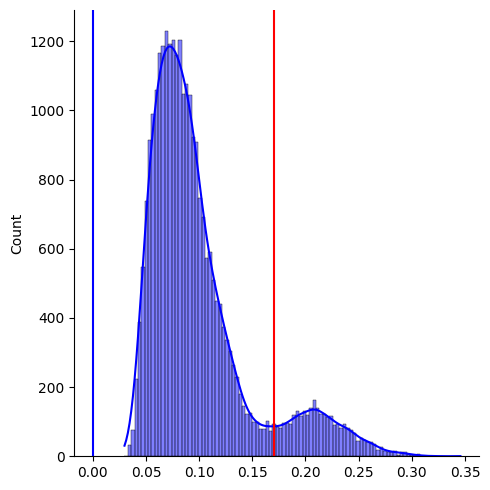

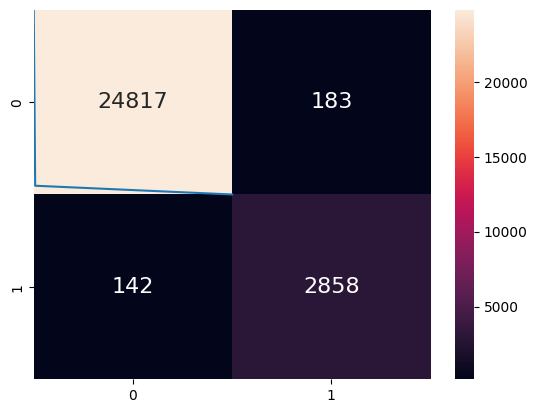

In [7]:
import random

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
import time
import random
import matplotlib.pyplot as plt
import torch.nn as nn
import seaborn as sns
from collections import defaultdict
from datetime import timedelta

df = pd.read_csv('./input/digit-recognizer/test.csv')
print(df)

anom = df[:3000]
clean = df[3000:]


for i in range(len(anom)):
    # select row from anom
    row = anom.iloc[i]
    # iterate through each element in row
    for i in range(len(row)-1):
        # add noise to element
        row[i+1] = min(255, row[i+1]+random.randint(50,150))

anom['label'] = 1
clean['label'] = 0

an_test = pd.concat([anom, clean])
an_test.sample(frac=1)
an_test.to_csv('test_data.csv')

plt.figure(figsize=(10,8))
img = anom.iloc[1:2, 1:]
img = img.values.reshape(28,28)
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title('Abnormal')
plt.grid()

img1 = clean.iloc[2:3, 1:]
img1 = img1.values.reshape(28,28)
plt.subplot(1,2,2)
plt.imshow(img1,cmap='gray')
plt.title('Normal')
plt.grid()
plt.show()

import torch.nn as nn
class AE(nn.Module):
    def __init__(self):
        super(AE, self).__init__()
        self.enc = nn.Sequential(
            nn.Linear(784, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU()
        )
        self.dec = nn.Sequential(
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 784),
            nn.ReLU()
        )
    def forward(self, x):
        encode = self.enc(x)
        decode = self.dec(encode)
        return decode

batch_size = 32
lr = 1e-2         # learning rate
w_d = 1e-5        # weight decay
epochs = 15

class Loader(torch.utils.data.Dataset):
    def __init__(self):
        super(Loader, self).__init__()
        self.dataset = ''

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        row = self.dataset.iloc[idx]
        row = row.drop(labels={'label'})
        data = torch.from_numpy(np.array(row)/255).float()
        return data

class Train_Loader(Loader):
    def __init__(self):
        super(Train_Loader, self).__init__()
        self.dataset = pd.read_csv(
                       './input/digit-recognizer/train.csv',
                       index_col=False
                       )

train_set = Train_Loader()
train_ = torch.utils.data.DataLoader(
            train_set,
            batch_size=batch_size,
            shuffle=True,
            num_workers=20,
            pin_memory=True,
            drop_last=True
        )


metrics = defaultdict(list)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = AE()
model.to(device)
criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=lr, weight_decay=w_d)


model.train()
start = time.time()
for epoch in range(epochs):
    ep_start = time.time()
    running_loss = 0.0
    for bx, (data) in enumerate(train_):
        sample = model(data.to(device))
        loss = criterion(data.to(device), sample)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss/len(train_set)
    metrics['train_loss'].append(epoch_loss)
    ep_end = time.time()
    print('-----------------------------------------------')
    print('[EPOCH] {}/{}\n[LOSS] {}'.format(epoch+1,epochs,epoch_loss))
    print('Epoch Complete in {}'.format(timedelta(seconds=ep_end-ep_start)))
end = time.time()
print('-----------------------------------------------')
print('[System Complete: {}]'.format(timedelta(seconds=end-start)))

_, ax = plt.subplots(1,1,figsize=(15,10))
ax.set_title('Loss')
ax.plot(metrics['train_loss'])

model.eval()
loss_dist = []
anom = pd.read_csv('test_data.csv', index_col=[0])
#for bx, data in enumerate(test_):
for i in range(len(anom)):
    data = torch.from_numpy(np.array(anom.iloc[i][1:])/255).float()
    sample = model(data.to(device))
    loss = criterion(data.to(device), sample)
    loss_dist.append(loss.item())

lower_threshold = 0.0
upper_threshold = 0.17
plt.figure(figsize=(12,6))
plt.title('Loss Distribution')

# debug due to deprecated
#sns.distplot(loss_dist,bins=100,kde=True, color='blue')
sns.displot(loss_dist,bins=100,kde=True, color='blue')

plt.axvline(upper_threshold, 0.0, 10, color='r')
plt.axvline(lower_threshold, 0.0, 10, color='b')

df = pd.read_csv('./test_data.csv', index_col=[0])
ddf = pd.DataFrame(columns=df.columns)
tp = 0
fp = 0
tn = 0
fn = 0
total_anom = 0
for i in range(len(loss_dist)):
    total_anom += df.iloc[i]['label']
    if loss_dist[i] >= upper_threshold:
        n_df = pd.DataFrame([df.iloc[i]])
        n_df['loss'] = loss_dist[i]
        ddf = pd.concat([df,n_df], sort = True)
        if float(df.iloc[i]['label']) == 1.0:
            tp += 1
        else:
            fp += 1
    else:
        if float(df.iloc[i]['label']) == 1.0:
            fn += 1
        else:
            tn += 1
print('[TP] {}\t[FP] {}\t[MISSED] {}'.format(tp, fp, total_anom-tp))
print('[TN] {}\t[FN] {}'.format(tn, fn))


conf = [[tn,fp],[fn,tp]]
plt.figure()
sns.heatmap(conf,annot=True,annot_kws={"size": 16},fmt='g')

y_pred = loss_dist

th = upper_threshold
for i in range(len(y_pred)):
  if y_pred[i]<th:
    y_pred[i] = -1
  else:
    y_pred[i] = 1

label = anom['label']

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
gt_list = np.asarray(label)
fpr, tpr, _ = roc_curve(gt_list, loss_dist)
img_roc_auc = roc_auc_score(gt_list, loss_dist)

plt.plot(fpr, tpr, label='ROCAUC: %.3f' % (img_roc_auc))
print(f'ROCAUC: {img_roc_auc:.3f}')